# Kernel PCA (For Non-Linear problems)

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

320 80 320 80


## Applying Kernel PCA

In [0]:
from sklearn.decomposition import KernelPCA
#rbf = gaussian kernel
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [7]:
print(X_train)

[[ 4.50528619e-01 -3.13281068e-01]
 [ 5.19434840e-01  3.24823469e-03]
 [-5.50725187e-01 -3.65525533e-01]
 [-5.45735978e-01 -2.22338077e-01]
 [ 4.22186140e-01  2.63719817e-01]
 [ 1.89411073e-01  2.17105158e-01]
 [ 1.82430267e-02  2.50331183e-01]
 [ 4.90918201e-01 -2.92948548e-01]
 [ 1.68435534e-01  6.32320574e-01]
 [-6.14995641e-02  4.95770482e-01]
 [ 2.94398661e-02  4.78422948e-01]
 [ 4.81528344e-01 -5.22571144e-01]
 [-5.30077117e-01 -3.63258645e-01]
 [-5.16319482e-01 -2.54990232e-01]
 [-2.99749674e-01 -5.01754946e-01]
 [-1.25905735e-01 -5.14817927e-01]
 [-4.90208602e-01 -4.27400684e-01]
 [ 2.46777764e-01  5.74714672e-01]
 [ 5.27984628e-01  7.50883607e-02]
 [ 4.65253400e-01 -2.39724450e-01]
 [ 6.08968416e-02  6.21385739e-01]
 [ 2.97944548e-01 -5.63534000e-01]
 [-2.90598489e-01  4.37787019e-01]
 [ 3.83918683e-01 -5.54083388e-01]
 [ 3.30429469e-01  3.88609473e-01]
 [ 6.29985341e-01 -1.57378721e-01]
 [-2.34464388e-01  4.93834421e-01]
 [-2.39433277e-01  3.61084533e-01]
 [-4.00248485e-01  3

In [8]:
print(X_test)

[[-0.22657878 -0.37498563]
 [-0.29059849  0.43778702]
 [-0.24817546  0.01723412]
 [-0.35285278 -0.29338059]
 [-0.44854449  0.26426172]
 [-0.41593956 -0.17024111]
 [-0.33802962 -0.02368312]
 [ 0.46962869 -0.53167558]
 [-0.29619935 -0.4680317 ]
 [ 0.22031361  0.62771957]
 [-0.59977118 -0.05402089]
 [-0.60230958 -0.19832858]
 [-0.33201665  0.35833428]
 [-0.0137138   0.17756853]
 [-0.21029488 -0.5077449 ]
 [ 0.26900256 -0.55533532]
 [-0.12233961  0.08907938]
 [-0.19758974 -0.49694154]
 [ 0.57201372 -0.33845684]
 [-0.31375008  0.19681232]
 [-0.45039451  0.27355428]
 [ 0.5775965  -0.45477471]
 [-0.10397074  0.55965054]
 [ 0.60297387 -0.18786154]
 [-0.43441893 -0.29874929]
 [ 0.58868845 -0.43249858]
 [-0.25746321 -0.4391909 ]
 [-0.3538196  -0.34594253]
 [-0.28913152  0.2978133 ]
 [-0.19205629 -0.28483428]
 [-0.20812473 -0.51668166]
 [-0.09418755  0.05565334]
 [ 0.48758866  0.24823931]
 [-0.33967444  0.3704351 ]
 [-0.54072632 -0.37955754]
 [-0.34668163 -0.42797285]
 [-0.30540442 -0.50645508]
 

## Training the Logistic Regression model on the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  4]
 [ 4 18]]


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


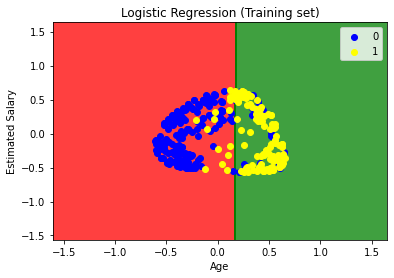

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


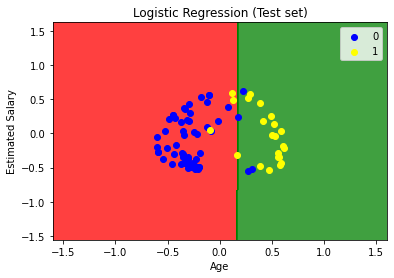

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()